In [1]:
import os
import sys
import datetime as dt

sys.path.append(r"..\..")
import pyphenocam

import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.append(r"J:\Projects\NCCSC\phenocam\Tools\DaymetPy\daymetpy")
import daymetpy

import rasterio

In [2]:
base_dname = r"J:\Projects\NCCSC\phenocam\DerivedData\nationalelkrefuge"
site_name = "nationalelkrefuge"

In [3]:
phenosite = pyphenocam.dataaccess.get_site(site_name)

In [4]:
landsat_dname = os.path.join(base_dname, 'Landsat', 'SceneSubset')
ndvi_fnames = [f for f in os.listdir(landsat_dname ) if 'ndvi' in f]
gcc_fnames = [f for f in os.listdir(landsat_dname ) if 'gcc' in f]
cloud_fnames = [f for f in os.listdir(landsat_dname ) if 'cloud' in f]

scene_data = {}
for scene in ndvi_fnames+gcc_fnames:
    year = scene[9:13]
    jday = scene[13:16]
    date = dt.datetime(int(year), 1, 1, 12) + dt.timedelta(int(jday))
    which = scene.split('_')[1].split('.')[0]
    if not scene_data.has_key(date):
        scene_data[date] = {}
    data = rasterio.open(os.path.join(landsat_dname, scene)).read(1, masked=True)
    cloud_data = rasterio.open(os.path.join(landsat_dname, scene).replace(which, 'cloud')).read(1)
    data.mask += cloud_data==4
    scene_data[date][which] = data
    
scene_dates= scene_data.keys()
scene_dates.sort()

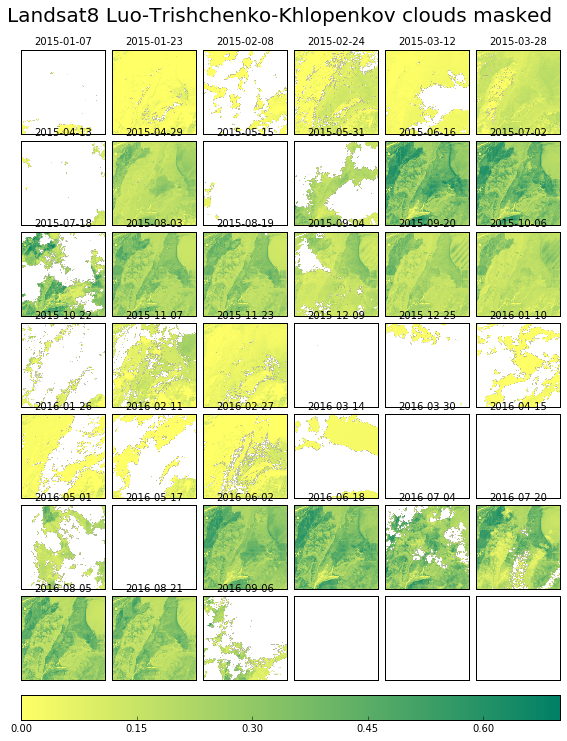

In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(1, (12., 12.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(7, 6),  # creates 7x6 grid of axes
                 axes_pad=0.1,  # pad between axes in inches
                 share_all=True,
                    cbar_location="bottom",
                    cbar_mode="single",)
for ax in grid:
    pyphenocam.plotting.format_photo_axes(ax)

for i, scene_date in enumerate(scene_dates):
    im =grid[i].imshow(scene_data[scene_date]['ndvi'], vmin=0., vmax=0.7, cmap=mpl.cm.summer_r)
#     pyphenocam.plotting.add_inner_title(grid[i], scene_date.strftime("%Y-%m-%d"), 9, size=8)   
    grid[i].set_title(scene_date.strftime("%Y-%m-%d"), fontsize=10)
    
grid.cbar_axes[0].colorbar(im)

fig.suptitle(u"Landsat8 Luo-Trishchenko-Khlopenkov clouds masked", fontsize=20, y=.95)
# plt.tight_layout()

fig.savefig(os.path.join(r"J:\Projects\NCCSC\phenocam\Doc\Presentation", "landsatscenes.jpg"), dpi=270)

In [10]:
scene_data[scene_date].keys()

['ndvi', 'gcc']

<IPython.core.display.Javascript object>


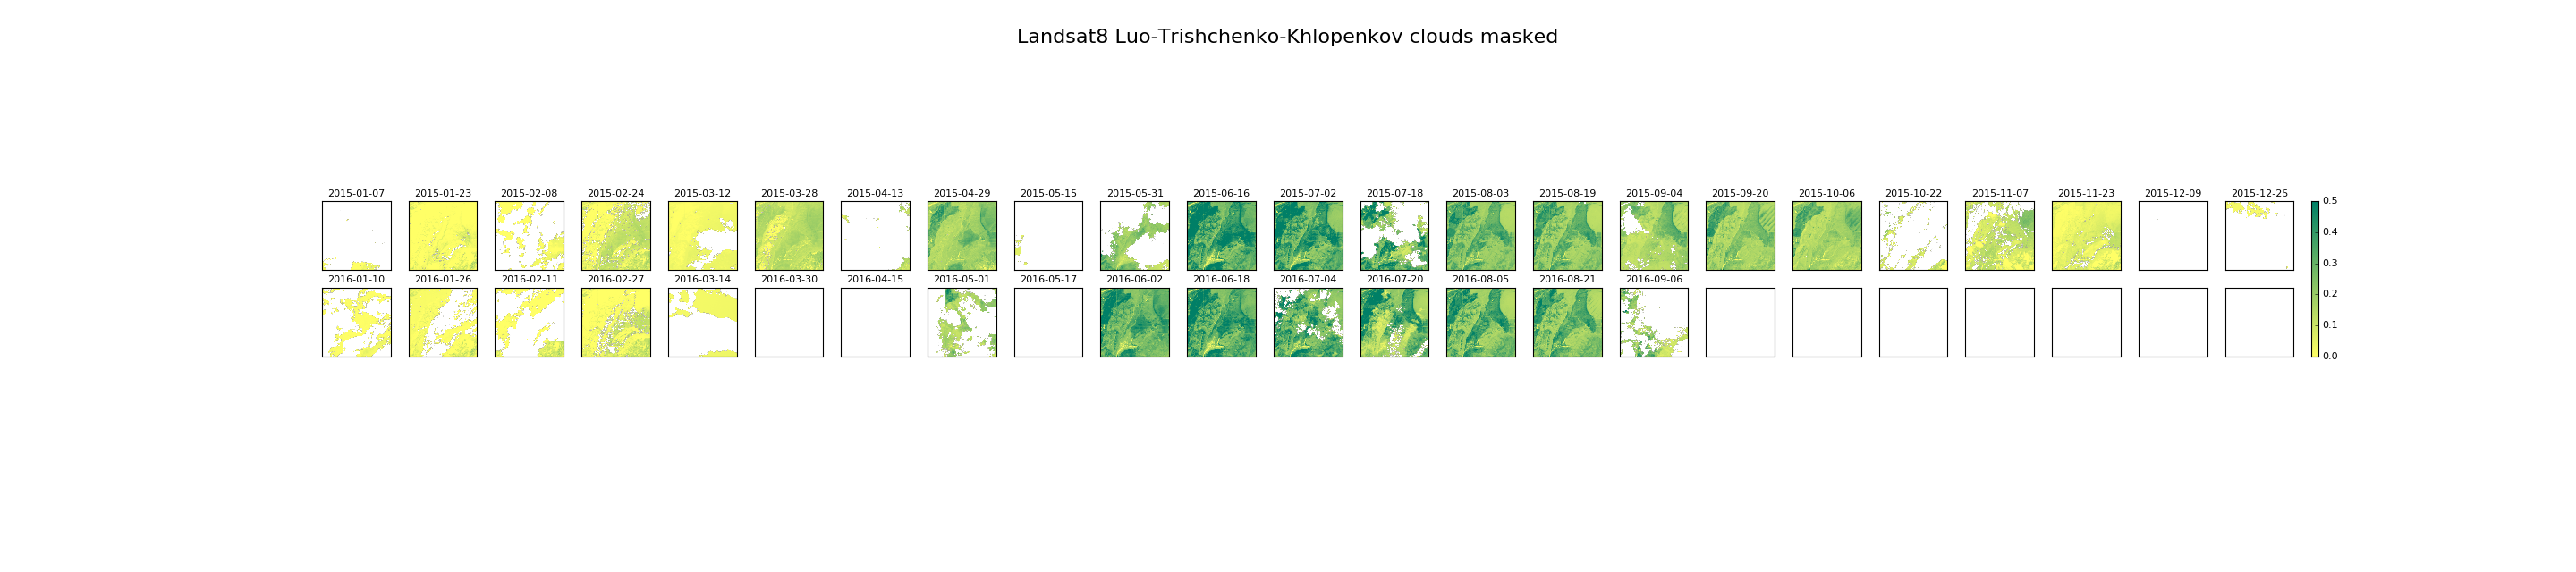

In [21]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(1, (36., 8.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(2, 23),  # creates 2x2 grid of axes
                 axes_pad=0.25,  # pad between axes in inch.
                 share_all=True,
                    cbar_location="right",
                    cbar_mode="single",)

for ax in grid:
    pyphenocam.plotting.format_photo_axes(ax)

for i, scene_date in enumerate(scene_dates):
    im =grid[i].imshow(scene_data[scene_date]['ndvi'], vmin=0., vmax=.5, cmap=mpl.cm.summer_r)
    grid[i].set_title(scene_date.strftime("%Y-%m-%d"), fontsize=10)
    pyphenocam.plotting.format_photo_axes(grid[i])
    
    
fig.suptitle(u"Landsat8 Luo-Trishchenko-Khlopenkov clouds masked", fontsize=20, y=.95)
grid.cbar_axes[0].colorbar(im)

In [11]:
base_dname = r"J:\Projects\NCCSC\phenocam\DerivedData\nationalelkrefuge"
site_name = "nationalelkrefuge"
site = pyphenocam.dataaccess.get_site(site_name)

2016-05-29 12:30:00


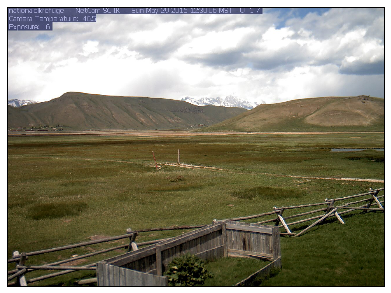

In [15]:
%matplotlib inline
landsat_fishnet_fname = os.path.join(base_dname, "ArcScene", "landsat_fishnet.bmp")
landsat_index_fname = os.path.join(base_dname, "ArcScene", "landsat_subset_index.bmp")

phenosite = pyphenocam.dataaccess.get_site(site_name)

closest_date = dt.datetime(2016, 5, 29, 12, 30)
print closest_date
sample_photo_fname = phenosite.get_closest_fname(closest_date)

local_fname = phenosite.get_local_image_fname(sample_photo_fname)
local_fname_ir = phenosite.get_local_image_fname(sample_photo_fname, IR=True)
sample_image = phenosite.get_local_image(sample_photo_fname)
sample_image_ir = phenosite.get_local_image(sample_photo_fname, IR=True)

fig, ax = plt.subplots(1, figsize=(12,5))
ax.imshow(sample_image)
pyphenocam.plotting.format_photo_axes(ax)

In [6]:
fig = plt.figure(1, (12., 12.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(4, 4),  # creates 2x2 grid of axes
                 axes_pad=0.2,  # pad between axes in inch.
                 share_all=True,
                    cbar_location="bottom",
                    cbar_mode="single",)

for i, scene_date in enumerate(scene_dates):
    print scene_date,
    closest_photo_fname = phenosite.get_closest_fname(scene_date)
    print closest_photo_fname
    im =grid[i].imshow(phenosite.get_local_image(closest_photo_fname))
    pyphenocam.plotting.format_photo_axes(grid[i])
grid.cbar_axes[0].colorbar(im)

2015-01-07 12:00:00

Exception: data for year/month 2015/1 not available